IMPORT NEEDED LIBRARIES

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

**BINARY DATASET**

IMPORT AND READ BINARY DATASET

In [ ]:
names = ['pH','TDS','Turbidity','Phospate','Nitrate','Iron','COD(mg/L)','Chlorine','Sodium','Class']
bdataframe = pd.read_csv("binary.csv", names=names)
array = bdataframe.values
Xb = array[:,0:9]
Yb = array[:,9]

SPLITTING TRAIN,TEST AND VALIDATION DATA

In [ ]:
Xb_train, Xb_test, Yb_train, Yb_test = train_test_split(Xb, Yb, test_size=0.3) 
Xb_test, Xb_val, Yb_test, Yb_val = train_test_split(Xb_test, Yb_test, test_size=0.4)

SPECIFYING BASE CLASSIFIERS

In [ ]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)]
lr = LogisticRegression()

CREATING AND FITTING STACKING CLASSIFIER TO MODEL

In [ ]:
bstart = time.time()
stacking = StackingClassifier(estimators = clf,final_estimator = lr)
b_stacking_model = stacking.fit(Xb_train, Yb_train)
bend = time.time()
# total time taken
print(f"Runtime of the Stacking is {bend - bstart}")

Runtime of the Stacking is 3.124774217605591


ACCURACY

In [ ]:
Yb_pred = b_stacking_model.predict(Xb_test)
print("Accuracy on test data:", metrics.accuracy_score(Yb_test, Yb_pred))
Yb_val_pred = b_stacking_model.predict(Xb_val)
print("Accuracy on validation data:", metrics.accuracy_score(Yb_val, Yb_val_pred))

Accuracy on test data: 1.0
Accuracy on validation data: 1.0


CONFUSION MATRIX

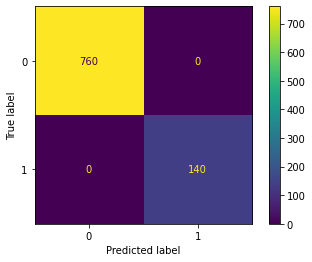

In [ ]:
cm = confusion_matrix(Yb_test, Yb_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

AUC-ROC CURVE

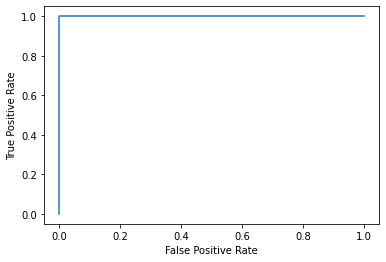

In [ ]:
fpr, tpr, _ = roc_curve(Yb_test, Yb_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

PRECISION-RECALL-F1 SCORE

In [ ]:
print("Precision-Recall-Fscore[binary] on test data:", precision_recall_fscore_support(Yb_test, Yb_pred, average='binary'))
print("Precision-Recall-Fscore[binary] on validation data:", precision_recall_fscore_support(Yb_val, Yb_val_pred, average='binary'))

Precision-Recall-Fscore[binary] on test data: (1.0, 1.0, 1.0, None)
Precision-Recall-Fscore[binary] on validation data: (1.0, 1.0, 1.0, None)


PRECISION RECALL DISPLAY

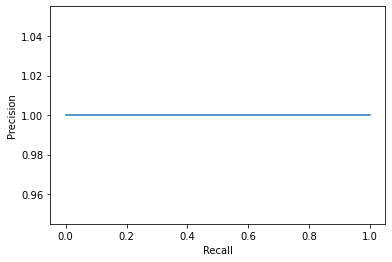

In [ ]:
prec, recall, _ = precision_recall_curve(Yb_test, Yb_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

CROSS VALIDATION SCORE

In [ ]:
results = cross_val_score(stacking,Xb,Yb,cv = 5,scoring = 'accuracy')
print("Cross validation score:", results.mean())

Cross validation score: 0.9991999999999999


**MULTICLASS DATASET**

IMPORT AND READ MULTICLASS DATASET

In [ ]:
mdataframe = pd.read_csv("multi.csv", names=names)
array = mdataframe.values
Xm = array[:,0:9]
Ym = array[:,9]

SPLITTING TRAIN, TEST AND VALIDATION DATA

In [ ]:
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, test_size=0.3) 
Xm_test, Xm_val, Ym_test, Ym_val = train_test_split(Xm_test, Ym_test, test_size=0.4)

CREATING AND FITTING BAGGING CLASSIFIER TO MODEL

In [ ]:
mstart = time.time()
m_stacking_model = stacking.fit(Xm_train, Ym_train)
mend = time.time()
# total time taken
print(f"Runtime of the Stacking is {mend - mstart}")

Runtime of the Stacking is 7.993763208389282


ACCURACY

In [ ]:
Ym_pred = m_stacking_model.predict(Xm_test)
print("Accuracy on test data:", metrics.accuracy_score(Ym_test, Ym_pred))
Ym_val_pred = m_stacking_model.predict(Xm_val)
print("Accuracy on validation data:", metrics.accuracy_score(Ym_val, Ym_val_pred))

Accuracy on test data: 1.0
Accuracy on validation data: 1.0


CONFUSION MATRIX

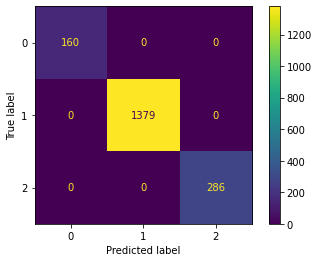

In [ ]:
cm = confusion_matrix(Ym_test, Ym_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

PRECISION-RECALL-F1 SCORE

In [ ]:
print("Precision-Recall-Fscore[weighted] on test data:", precision_recall_fscore_support(Ym_test, Ym_pred, average='weighted'))
print("Precision-Recall-Fscore[weighted] on validation data:", precision_recall_fscore_support(Ym_val, Ym_val_pred, average='weighted'))

Precision-Recall-Fscore[weighted] on test data: (1.0, 1.0, 1.0, None)
Precision-Recall-Fscore[weighted] on validation data: (1.0, 1.0, 1.0, None)


AUC-ROC CURVE

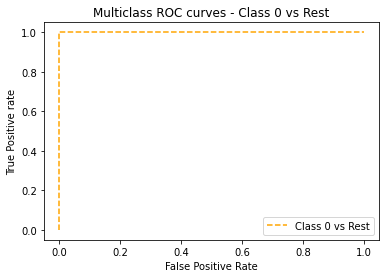

In [ ]:
n_class = 3
Ym_pred_prob = m_stacking_model.predict_proba(Xm_test)
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(Ym_test, Ym_pred_prob[:,i], pos_label=i)
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.title('Multiclass ROC curves - Class 0 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC - class 0',dpi=300)

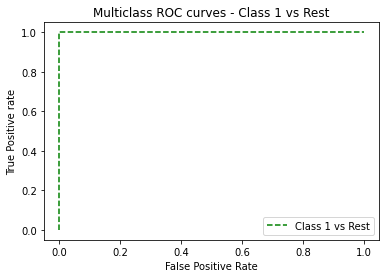

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curves - Class 1 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC - class 1',dpi=300)

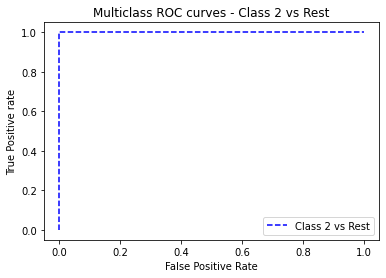

In [ ]:
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curves - Class 2 vs Rest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC - class 2',dpi=300)

CROSS VALIDATION SCORE

In [ ]:
score = cross_val_score(stacking,Xm,Ym,cv = 5,scoring = 'accuracy')
print("The accuracy score of is:",score.mean())

The accuracy score of is: 1.0


BASE MODELS ACCURACY

In [ ]:
clf1 = [dtc,rfc,knn,xgb,lr]
clf2 = [dtc,rfc,knn,xgb]
print("BINARY DATASET")
for algo in clf1:
    bscore = cross_val_score( algo,Xb,Yb,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),bscore.mean())
print("\n\n\n")
print("MULTICLASS DATASET")
for algo in clf2:
    mscore = cross_val_score( algo,Xm,Ym,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),mscore.mean())

BINARY DATASET
The accuracy score of DecisionTreeClassifier() is: 0.9991999999999999
The accuracy score of RandomForestClassifier() is: 0.9994
The accuracy score of KNeighborsClassifier() is: 0.9260000000000002
The accuracy score of XGBClassifier() is: 0.9997999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The accuracy score of LogisticRegression() is: 0.8934




MULTICLASS DATASET
The accuracy score of DecisionTreeClassifier() is: 0.9999013806706115
The accuracy score of RandomForestClassifier() is: 0.999802761341223
The accuracy score of KNeighborsClassifier() is: 0.9271130176541735
The accuracy score of XGBClassifier() is: 0.999802761341223
